### Predict a car's market price by its attributes, using K-nearest neighbors

#### Learning about the dataset

In [1]:
import pandas as pd
import numpy as np

In [51]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)
cars[:10]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [52]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [53]:
cars.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


#### Select the cars with only continous values

In [54]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars[:10]

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,?


#### Data Cleaning

In [55]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Remove the rows of null value in Price, since we need price numbers to do cross validation

In [56]:
numeric_cars = numeric_cars.dropna(subset=["price"])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

For other features columns, replace null values with columns means

In [57]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Normalize all the features columns

In [61]:
features = numeric_cars.columns.drop('price')
numeric_cars[features] = numeric_cars[features].apply(lambda x: (x - np.mean(x))/np.std(x))

In [63]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,13495.0
1,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,16500.0
2,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,-2.433435,0.675938,-0.291435,1.357649,-0.246556,-0.964397,-0.689386,16500.0
3,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.526210,0.453899,-0.041121,-0.037480,0.801833,-0.184027,-0.100993,13950.0
4,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,-0.526210,0.453899,-0.541748,0.311302,0.801833,-1.120471,-1.277779,17450.0
5,0.000000,0.165748,0.252126,0.196040,-0.273031,-0.094314,-0.526210,0.453899,-0.416591,0.177155,0.801833,-0.964397,-0.836484,15250.0
6,1.127941,1.157278,1.505026,2.628971,0.791790,0.558777,-0.526210,0.453899,-0.416591,0.177155,0.801833,-0.964397,-0.836484,17710.0
7,0.000000,1.157278,1.505026,2.628971,0.791790,0.771951,-0.526210,0.453899,-0.416591,0.177155,0.801833,-0.964397,-0.836484,18920.0
8,1.127941,1.157278,1.505026,2.628971,0.873699,1.027761,-0.750589,0.453899,-0.466654,0.982037,0.801833,-1.276544,-1.571976,23875.0
10,2.193219,0.397105,0.211448,-0.519528,0.218425,-0.311364,0.633084,-1.449289,-0.341497,-0.064310,1.430866,-0.340101,-0.248091,16430.0


#### Start with Univariate Model to help build a prediction model

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_cl, target_cl, df):
    #randomize the orders of the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    #Split dataset into train and test data
    split_point = int(len(random_df) / 2)
    train = random_df.iloc[:split_point]
    test = random_df.iloc[split_point:]
    
    #Fit the training set into the model and predict on the test dataset 
    knn = KNeighborsRegressor()
    knn.fit(train[[train_cl]], train[target_cl])
    predicted = knn.predict(test[[train_cl]])
    
    #Calculate the RMSE
    mse = mean_squared_error(test[target_cl], predicted)
    rmse = mse**(1/2)
    
    return rmse

In [67]:
rmse_values = {}
for col in features:
    rmse_values[col] = knn_train_test(col, "price", numeric_cars)
    
#create a series of rmse values to easily sort and show result
rmse_series = pd.Series(rmse_values)
rmse_series.sort_values()

horsepower           4031.116860
curb-weight          4445.141920
highway-mpg          4625.047587
width                4694.316412
city-mpg             4902.276998
length               5427.879399
wheel-base           5460.787788
compression-rate     6648.286537
bore                 6804.368876
normalized-losses    7340.503533
peak-rpm             7689.884548
height               7812.116487
stroke               7925.729608
dtype: float64

#### Add in another parameter k value in K nearest neighbors

In [70]:
def knn_train_test(train_cl, target_cl, df):
    #randomize the orders of the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    #Split dataset into train and test data
    split_point = int(len(random_df) / 2)
    train = random_df.iloc[:split_point]
    test = random_df.iloc[split_point:]
    
    
    k_values = [1,3,5,7,9]
    k_rmse_values = {}
    #Fit the training set into the model and predict on the test dataset
    #Use loop to predict on different k values
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
    
        knn.fit(train[[train_cl]], train[target_cl])
        predicted = knn.predict(test[[train_cl]])

    #Calculate the RMSE
        mse = mean_squared_error(test[target_cl], predicted)
        rmse = mse**(1/2)
    
        k_rmse_values[k] = rmse
        
    return k_rmse_values

In [85]:
rmse_values = {}
for col in features:
    rmse_values[col] = knn_train_test(col, "price", numeric_cars)
    
rmse_values

{'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 6804.368875833808,
  7: 6870.0456256979505,
  9: 6874.543205884549},
 'city-mpg': {1: 5863.190943471308,
  3: 4601.544717915833,
  5: 4902.27699788174,
  7: 4903.062402459158,
  9: 5071.931882819204},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6648.286537056889,
  7: 6744.105389924311,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5011.8789151002,
  5: 4445.141920375235,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 7812.116487220412,
  7: 7640.437586660841,
  9: 7848.132113523037},
 'highway-mpg': {1: 6025.594966720739,
  3: 4627.504512974759,
  5: 4625.047587445843,
  7: 4734.552253894505,
  9: 5177.99664673131},
 'horsepower': {1: 4170.054848037801,
  3: 4037.1605570049237,
  5: 4031.1168602989096,
  7: 4208.1666010569215,
  9: 4509.268454580779},
 'length': {1: 4678.174812280686,
  3: 5168.115504300052,
  5:

Visualize the result between k values and trained column

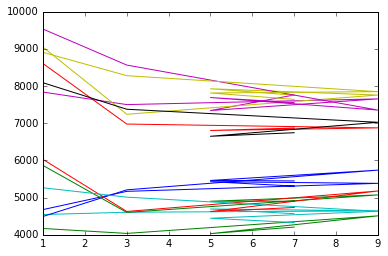

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

for col, value in rmse_values.items():
    k = list(value.keys())
    rmse = list(value.values())

    plt.plot(k, rmse)

####  Merge in multi columns in the model

Calculate the means of all rmse of each column, to decide the best feature columns

In [92]:
col_mean_rmse = {}

for col, value in rmse_values.items():
    mean_rmse = np.mean(list(value.values()))
    col_mean_rmse[col] = mean_rmse
    
mean_rmse_series = pd.Series(col_mean_rmse)
mean_rmse_series.sort_values()

horsepower           4191.153464
width                4610.872305
curb-weight          4736.877136
highway-mpg          5038.139194
city-mpg             5068.401389
length               5193.374358
wheel-base           5269.942030
compression-rate     7175.829297
bore                 7225.733921
normalized-losses    7618.041354
stroke               7943.826477
height               8096.468457
peak-rpm             8137.766290
dtype: float64

In [93]:
# Train_cl must be a list
def knn_train_test(train_cl, target_cl, df):
    #randomize the orders of the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    #Split dataset into train and test data
    split_point = int(len(random_df) / 2)
    train = random_df.iloc[:split_point]
    test = random_df.iloc[split_point:]
    
    #Fit the training set into the model and predict on the test dataset
    knn = KNeighborsRegressor()

    knn.fit(train[train_cl], train[target_cl])
    predicted = knn.predict(test[train_cl])

    #Calculate the RMSE
    mse = mean_squared_error(test[target_cl], predicted)
    rmse = mse**(1/2)
        
    return rmse

In [95]:
col_2 = ['horsepower','width']
col_3 = ['horsepower','width','curb-weight']
col_4 = ['horsepower','width','curb-weight','highway-mpg']
col_5 = ['horsepower','width','curb-weight','highway-mpg','city-mpg']

print(knn_train_test(col_2, 'price', numeric_cars))
print(knn_train_test(col_3, 'price', numeric_cars))
print(knn_train_test(col_4, 'price', numeric_cars))
print(knn_train_test(col_5, 'price', numeric_cars))

3587.6781582974736
3315.179311728235
3364.4454402465853
3346.3794863306603


In [96]:
def knn_train_test(train_cl, target_cl, df):
    #randomize the orders of the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    #Split dataset into train and test data
    split_point = int(len(random_df) / 2)
    train = random_df.iloc[:split_point]
    test = random_df.iloc[split_point:]
    
    #Fit the training set into the model and predict on the test dataset
    #iterate over k values between 1 and 25
    k_rmse_values = {}
    for k in range(1,26):
        knn = KNeighborsRegressor(n_neighbors = k)

        knn.fit(train[train_cl], train[target_cl])
        predicted = knn.predict(test[train_cl])

    #Calculate the RMSE
        mse = mean_squared_error(test[target_cl], predicted)
        rmse = mse**(1/2)
        
        k_rmse_values[k] = rmse
        
    return k_rmse_values

In [99]:
k_best_result = {}
k_best_result['three'] = knn_train_test(col_3, 'price', numeric_cars)
k_best_result['five'] = knn_train_test(col_5, 'price', numeric_cars)
k_best_result['four'] = knn_train_test(col_4, 'price', numeric_cars)

k_best_result    

{'five': {1: 2536.2720615693083,
  2: 2959.813922017784,
  3: 3111.229799225117,
  4: 3199.3074433313604,
  5: 3346.3794863306603,
  6: 3675.5840031247285,
  7: 3881.541421865612,
  8: 3987.024841118288,
  9: 3986.2156175243376,
  10: 4154.4568632391465,
  11: 4317.598994123106,
  12: 4477.41729844312,
  13: 4497.021859534609,
  14: 4461.661821749708,
  15: 4492.38034637069,
  16: 4552.763836478077,
  17: 4585.976537861621,
  18: 4644.4509283481775,
  19: 4646.0064290900345,
  20: 4661.95649416,
  21: 4754.46158569013,
  22: 4809.777569391321,
  23: 4826.84825961205,
  24: 4873.1290634705765,
  25: 4903.6559538837355},
 'four': {1: 2586.502746073459,
  2: 2828.392180940953,
  3: 3077.1371106240554,
  4: 3199.1386762380243,
  5: 3364.4454402465853,
  6: 3616.3833918202954,
  7: 3860.942333284672,
  8: 4050.0264938474584,
  9: 4071.0341714401775,
  10: 4212.593894643551,
  11: 4273.165431772904,
  12: 4410.265774344844,
  13: 4456.848653835364,
  14: 4424.140601675838,
  15: 4445.7406189

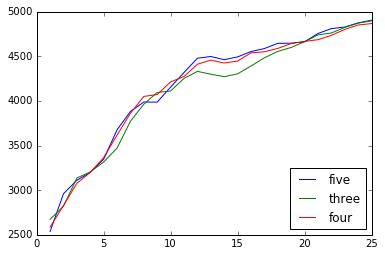

In [106]:
for n, kv in k_best_result.items():
    k = list(kv.keys())
    rmse = list(kv.values())
    
    plt.plot(k,rmse, label=n)
    plt.legend(loc='lower right')